In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm

from textblob.sentiments import NaiveBayesAnalyzer

import pandas as pd
import sqlite3
from textblob import TextBlob

import seaborn as sns
sns.set(color_codes=True)

# encoding=utf8
import sys
reload(sys)
sys.setdefaultencoding('utf8')

import spacy
nlp = spacy.load('en')

import re

In [193]:
df = pd.read_csv('../pitchfork2.csv')

# df['word_count'] = df['content'].str.count('\w+')
# df['adj_count'] = df['content_adj'].str.count('\w+')

# df['avg_word_length'] = df['content'].str.count('[^ ]') / df['word_count']
# df['adj_word_length'] = df['content_adj'].str.count('[^ ]') / df['content_adj'].str.count('\w+')
# df['adj_freq'] = df['adj_count'] / df['word_count']

In [194]:
years = np.arange(1999, 2018)
df_new = df[df['new_album'] == 1]
df_reissue = df[df['new_album'] == 0]

In [195]:
df_spot = pd.read_csv('spotifydata.csv')

In [197]:
df_spot['year'] = df_spot['album_release_year'].str[0:4].astype(int)

In [198]:
df_spot_grouped = df_spot.groupby(['artist', 'album_name']).mean()
df_spot_grouped.reset_index(inplace=True)
df_spot_grouped['title'] = df_spot_grouped['album_name'].str.lower()

In [199]:
df.drop(['num_years_since_release', 'year'], axis=1, inplace=True)

In [201]:
df_spot_grouped.head()

,artist,album_name,album_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_popularity,year,title
0,(sandy) alex g,Beach Music,21.0,0.504162,0.436923,-11.217231,0.032885,0.375259,0.172956,0.182892,0.363815,112.474923,171639.076923,3.769231,9.000000,2015.0,beach music
1,(sandy) alex g,DSU,43.0,0.543733,0.480467,-10.483867,0.038660,0.414190,0.509996,0.117433,0.437367,130.140733,151305.800000,3.733333,29.266667,2014.0,dsu
2,(sandy) alex g,Rocket,59.0,0.461143,0.588929,-7.042714,0.049843,0.283422,0.313242,0.222736,0.462714,128.357714,179333.642857,3.714286,43.642857,2017.0,rocket
3,(sandy) alex g,Rules,37.0,0.524077,0.438923,-9.794846,0.037515,0.576051,0.514030,0.131854,0.410546,119.035000,158009.307692,3.769231,21.230769,2015.0,rules
4,(sandy) alex g,Trick,33.0,0.540813,0.508813,-8.905437,0.043625,0.483672,0.518422,0.172306,0.416263,109.379688,141519.062500,3.875000,14.937500,2015.0,trick


In [164]:
df.head()

,Unnamed: 0,index,reviewid,title,artist,url,score,best_new_music,best_new_reissue,author,...,cont_polarity,cont_subjectivity,abs_polarity,abs_subjectivity,word_count,adj_count,adj_freq,score_bin,avg_word_length,adj_word_length
0,0,22,5a3aa14cdea49a0a938ccb18,merry christmas lil mama: re-wrapped,"chance the rapper, jeremih",https://pitchfork.com/reviews/albums/merry-chr...,7.7,0,0,marc hogan,...,0.177744,0.537219,0.177744,0.537219,1389.0,124.0,0.089273,7,4.535637,6.040323
1,1,23,5a2eacf785030943c5158845,pressure,jeezy,https://pitchfork.com/reviews/albums/pressure/,6.3,0,0,sheldon pearce,...,0.059904,0.431901,0.059904,0.431901,895.0,63.0,0.070391,6,4.375419,6.380952
2,2,24,5a0a0f9fd5ec0a321fb119a2,the beautiful & damned,g-eazy,https://pitchfork.com/reviews/albums/g-eazy-th...,5.1,0,0,sheldon pearce,...,-0.096061,0.704170,-0.096061,0.704170,993.0,87.0,0.087613,5,4.399799,6.298851
3,3,25,5a285f957d91d040cf1e35e1,quiet storm,shy glizzy,https://pitchfork.com/reviews/albums/shy-glizz...,7.1,0,0,jay balfour,...,0.132828,0.510859,0.132828,0.510859,653.0,50.0,0.076570,7,4.419602,6.620000
4,4,26,5a2eb9d5a31af72b3b598039,pop 2,charli xcx,https://pitchfork.com/reviews/albums/charli-xc...,8.4,1,0,meaghan garvey,...,0.098794,0.517791,0.098794,0.517791,1368.0,139.0,0.101608,8,4.610380,6.892086


In [202]:
df = df.merge(df_spot_grouped, on=['artist', 'title'])

In [203]:
df['num_years_since_release'] = df['pub_year'] - df['year']

In [204]:
df.groupby('year')['score'].count()

year
1960.0      1
1961.0      1
1964.0      1
1965.0      1
1967.0      1
1969.0      1
1970.0      2
1971.0      3
1972.0      3
1973.0      3
1974.0      2
1975.0      4
1976.0      4
1977.0      3
1978.0      3
1979.0      5
1980.0      4
1981.0      3
1982.0      2
1983.0      8
1984.0      3
1985.0      5
1986.0      2
1987.0      2
1988.0      7
1989.0      5
1990.0      2
1991.0      9
1992.0     10
1993.0      5
1994.0     13
1995.0     10
1996.0      9
1997.0     10
1998.0     13
1999.0     29
2000.0     52
2001.0     61
2002.0     73
2003.0     79
2004.0     97
2005.0     97
2006.0    110
2007.0    143
2008.0    139
2009.0    170
2010.0    212
2011.0    219
2012.0    287
2013.0    312
2014.0    291
2015.0    657
2016.0    739
2017.0    741
2018.0      2
Name: score, dtype: int64

In [106]:
df[df['best_new_music'] == 1].groupby('pub_year')['album_popularity'].mean()

pub_year
2003    361.666667
2004    436.600000
2005    617.900000
2006    577.000000
2007    425.304348
2008    459.428571
2009    437.000000
2010    405.378378
2011    445.222222
2012    374.794872
2013    527.078947
2014    456.928571
2015    515.250000
2016    645.603774
2017    666.090909
Name: album_popularity, dtype: float64

In [37]:
df.drop([u'genre_electronic', u'genre_experimental',
       u'genre_folk/country', u'genre_global', u'genre_jazz', u'genre_metal',
       u'genre_pop/r&b', u'genre_rap', u'genre_rock'], axis=1, inplace=True)


In [39]:
df.drop(['pub_weekday', 'year', 'pub_month'], axis=1, inplace=True)

In [45]:
df.drop([u'cont_polarity', u'cont_subjectivity', u'abs_polarity',
       u'abs_subjectivity', u'word_count', u'adj_count', u'adj_freq',
       u'score_bin', u'avg_word_length', u'adj_word_length', u'artist_y',
       u'album_name'], axis=1, inplace=True)

In [49]:
df.drop(['track_popularity'], axis=1, inplace=True)

ValueError: x and y must have same first dimension, but have shapes (19,) and (18,)

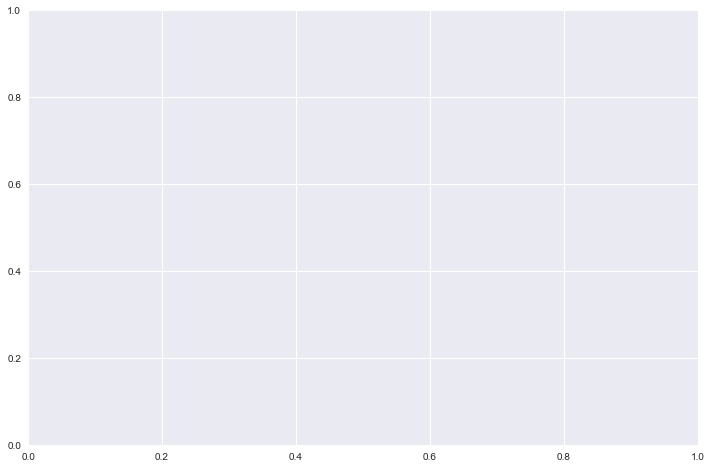

In [205]:
plt.figure(figsize=(12,8))
plt.plot(years, df[df['score'] > 9].groupby('pub_year')['valence'].mean())
plt.plot(years, df[df['score'] > 9].groupby('pub_year')['danceability'].mean())
# plt.plot(years, df[df['score'] > 9].groupby('pub_year')['liveness'].mean())
# plt.plot(years, df[df['score'] > 9].groupby('pub_year')['acousticness'].mean())
plt.plot(years, df[df['score'] > 9].groupby('pub_year')['energy'].mean())
plt.legend()
plt.show()

In [219]:
df[(df['instrumentalness'] > .6) & (df['energy'] < .4) & (df['score'] >= 8) & (df['content'].str.contains('ambient'))]

,Unnamed: 0,index,reviewid,title,artist,url,score,best_new_music,best_new_reissue,author,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_popularity,year,num_years_since_release
83,146,168,59f35307e68f6520a90c0afb,phantom brickworks,bibio,https://pitchfork.com/reviews/albums/bibio-pha...,8.2,0,0,andy beta,...,0.970111,0.869222,0.114567,0.108233,81.852556,4.885081e+05,4.222222,7.111111,2017.0,0.0
162,265,287,59c14dd09a887f6ba1bd7b02,new energy,four tet,https://pitchfork.com/reviews/albums/four-tet-...,8.0,0,0,andy beta,...,0.781571,0.723409,0.150829,0.287186,109.508929,2.419421e+05,3.785714,22.785714,2017.0,0.0
447,687,714,5929e802c0084474cd0c50fe,balsams,chuck johnson,https://pitchfork.com/reviews/albums/23275-chu...,8.1,0,0,marc masters,...,0.791667,0.895333,0.104083,0.079833,98.014167,4.135813e+05,3.000000,27.000000,2017.0,0.0
696,1064,1114,5929d8f013d197565213cc3d,no home of the mind,bing & ruth,https://pitchfork.com/reviews/albums/22888-bin...,8.2,0,0,mark richardson,...,0.921300,0.850300,0.103560,0.041340,75.969600,3.562898e+05,3.800000,36.300000,2017.0,0.0
698,1067,1117,5929d8ef0c2bba1b7de021ae,an act of love,earthen sea,https://pitchfork.com/reviews/albums/22896-ear...,8.1,0,0,andy beta,...,0.732875,0.823000,0.122088,0.196300,93.302000,2.887431e+05,3.750000,25.125000,2017.0,0.0
793,1240,1296,5929d9745e6ef959693247d9,clear sounds/perfetta,harry bertoia,https://pitchfork.com/reviews/albums/22715-cle...,8.0,0,0,marc masters,...,0.297000,0.730000,0.120000,0.025600,84.188000,1.020636e+06,4.000000,1.500000,2016.0,1.0
834,1320,1381,5929d9b00c2bba1b7de02263,what you get for being young,suzanne kraft,https://pitchfork.com/reviews/albums/22535-suz...,8.0,0,0,philip sherburne,...,0.587021,0.909429,0.153714,0.336429,104.257857,3.357420e+05,4.000000,15.571429,2016.0,0.0
1016,1585,1661,5929da7bd7a71d1ea5699be3,another green world,brian eno,https://pitchfork.com/reviews/albums/22061-ano...,10.0,0,0,mike powell,...,0.673429,0.622774,0.119800,0.354614,118.398429,1.753761e+05,3.642857,35.142857,1975.0,41.0
1031,1617,1696,5929da945e6ef959693248ef,goodbye to language,daniel lanois,https://pitchfork.com/reviews/albums/22289-goo...,8.1,0,0,philip sherburne,...,0.887250,0.856333,0.105883,0.047692,87.703417,1.838608e+05,3.416667,20.666667,2016.0,0.0
1146,1814,1902,5929db29c0084474cd0c4623,sketches from an island 2,mark barrott,https://pitchfork.com/reviews/albums/22062-ske...,8.0,0,0,andy beta,...,0.756556,0.908556,0.147800,0.391889,122.425667,2.919342e+05,4.000000,17.888889,2016.0,0.0


In [218]:
df[df['artist'].str.contains('william basinski')]

,Unnamed: 0,index,reviewid,title,artist,url,score,best_new_music,best_new_reissue,author,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_popularity,year,num_years_since_release
779,1210,1265,5929d96013d197565213cc9e,a shadow in time,william basinski,https://pitchfork.com/reviews/albums/22738-a-s...,7.9,0,0,daniel martin-mccormick,...,0.8220,0.880000,0.07090,0.25250,104.002000,1.299536e+06,4.5,29.500000,2017.0,0.0
1046,1640,1720,5929daa20c2bba1b7de0235b,92982,william basinski,https://pitchfork.com/reviews/albums/22277-wil...,8.7,1,1,kevin lozano,...,0.9640,0.899000,0.13685,0.04030,113.158000,9.412768e+05,4.0,24.750000,2009.0,7.0
2485,4405,4634,5929e318c0084474cd0c4e26,melancholia,william basinski,https://pitchfork.com/reviews/albums/19246-wil...,7.4,0,0,nick neyland,...,0.9825,0.872714,0.11095,0.07090,85.217357,1.999572e+05,3.5,30.357143,2003.0,11.0
2697,5323,5597,5929e5ba0c2bba1b7de02e5e,nocturnes,william basinski,https://pitchfork.com/reviews/albums/18282-wil...,7.5,0,0,nick neyland,...,0.9885,0.881500,0.09965,0.03735,103.076000,2.069500e+06,3.5,10.000000,2003.0,10.0
4456,17235,17939,5929d8960c2bba1b7de0214e,the river,william basinski,https://pitchfork.com/reviews/albums/576-the-r...,8.8,0,0,andy beta,...,0.5555,0.926500,0.36500,0.07825,78.214500,2.812614e+06,3.5,9.000000,2007.0,-4.0
